#### EMACS LISP STUFF PLEASE IGNORE
(defun switch-to-notebook ()
 (interactive)
 (st-toggle-to-buffer "*ein: http://127.0.0.1:8899/make_figs.ipynb*"))

In [1]:
%pylab inline
import os,sys
from importlib import reload
from copy import deepcopy
plt.style.use("default")
plt.rcParams["figure.figsize"] = (8,3)
from matplotlib.gridspec import GridSpec
from scipy.signal import stft
from builtins import sum as bsum

Populating the interactive namespace from numpy and matplotlib


In [2]:
import units; reload(units); UNITS = units.UNITS

In [6]:
import boulder; reload(boulder)
import crick; reload(crick)
import fisher_plumes_tools as fpt;      reload(fpt)
import fisher_plumes_figs  as fpf;      reload(fpf);
import fisher_plumes_fig_tools as fpft; reload(fpft)
import fisher_plumes as fp;             reload(fp)
import utils; reload(utils)
FisherPlumes = fp.FisherPlumes

force_reload = False
n_bootstraps = 50

crick.logger.setLevel(logging.DEBUG)

if force_reload or ('Fcr' not in locals()):
    pairs_mode = "unsigned"
    Fbw = FisherPlumes("boulder16", pitch = 7500 * UNITS.um,  freq_max = 20 * UNITS.hertz,
                       which_coords = [(0.45, 0.5),
                                       #(0.35,0.5),
                                       #(0.25,0.5),
                                       #(0.15,0.5)
                                       ]*UNITS.m,
                       py_mode = "relative",
                       #suffix = 'wideDomain.orig',
                       suffix='manuscript',
                       pairs_mode = pairs_mode, n_bootstraps = n_bootstraps, random_seed = 0)
    Fcr = FisherPlumes("n12dishT",  pitch = 76000 * UNITS.um, freq_max = 100 * UNITS.hertz,
                       which_coords = [(1.0, 0.5),
                                       #(0.9,0.5),
                                       #(0.7,0.5),
                                       #(0.6,0.5)
                                       ]*UNITS.m,

                       pairs_mode = pairs_mode, n_bootstraps = n_bootstraps, random_seed = 0)
else:
    Fbw = FisherPlumes(Fbw)
    Fcr = FisherPlumes(Fcr)
    
data = {
    "cr":Fcr,
    "bw":Fbw
}

INFO:boulder:Boulder simulation data available for:


INFO:boulder:Re100_0_5mm_50Hz_16source_manuscript.h5         : ['Odor Data/c1a', 'Odor Data/c1b', 'Odor Data/c2a', 'Odor Data/c2b', 'Odor Data/c3a', 'Odor Data/c3b', 'Odor Data/c4a', 'Odor Data/c4b', 'Odor Data/c5a', 'Odor Data/c5b', 'Odor Data/c6a', 'Odor Data/c6b', 'Odor Data/c7a', 'Odor Data/c7b', 'Odor Data/c8a', 'Odor Data/c8b'] (16 datasets)


INFO:crick:Simulation data available for:


INFO:crick:ff_int_sym_slow_high_tres_wide_n12dishT         : Y0.450 - Y0.550 (11 datasets)


           fisher_plumes 2023/04/28 18:18:26     INFO: sim_name=<fisher_plumes.FisherPlumes object at 0x7f2c0ccbba90> is a FisherPlumes object.


           fisher_plumes 2023/04/28 18:18:26     INFO: Attempting to copy data fields.


           fisher_plumes 2023/04/28 18:18:26    DEBUG: Copied field name.


           fisher_plumes 2023/04/28 18:18:26    DEBUG: Copied field pitch.


           fisher_plumes 2023/04/28 18:18:26    DEBUG: Copied field pitch_units.


           fisher_plumes 2023/04/28 18:18:26    DEBUG: Copied field sims.


           fisher_plumes 2023/04/28 18:18:26    DEBUG: Copied field pairs_um.


           fisher_plumes 2023/04/28 18:18:26    DEBUG: Copied field n_bootstraps.


           fisher_plumes 2023/04/28 18:18:26    DEBUG: Copied field random_seed.


           fisher_plumes 2023/04/28 18:18:26    DEBUG: Copied field yvals_um.


           fisher_plumes 2023/04/28 18:18:26    DEBUG: Copied field pairs_mode.


           fisher_plumes 2023/04/28 18:18:26    DEBUG: Copied field wnd.


           fisher_plumes 2023/04/28 18:18:26    DEBUG: Copied field freq_max.


           fisher_plumes 2023/04/28 18:18:26    DEBUG: Copied field sim0.


           fisher_plumes 2023/04/28 18:18:26    DEBUG: Copied field fs.


           fisher_plumes 2023/04/28 18:18:26    DEBUG: Copied field dimensions.


           fisher_plumes 2023/04/28 18:18:26     INFO: Copied data fields from FisherPlumes object.


           fisher_plumes 2023/04/28 18:18:26     INFO: sim_name=<fisher_plumes.FisherPlumes object at 0x7f2c0cf41070> is a FisherPlumes object.


           fisher_plumes 2023/04/28 18:18:26     INFO: Attempting to copy data fields.


           fisher_plumes 2023/04/28 18:18:26    DEBUG: Copied field name.


           fisher_plumes 2023/04/28 18:18:26    DEBUG: Copied field pitch.


           fisher_plumes 2023/04/28 18:18:26    DEBUG: Copied field pitch_units.


           fisher_plumes 2023/04/28 18:18:26    DEBUG: Copied field sims.


           fisher_plumes 2023/04/28 18:18:26    DEBUG: Copied field pairs_um.


           fisher_plumes 2023/04/28 18:18:26    DEBUG: Copied field n_bootstraps.


           fisher_plumes 2023/04/28 18:18:26    DEBUG: Copied field random_seed.


           fisher_plumes 2023/04/28 18:18:26    DEBUG: Copied field yvals_um.


           fisher_plumes 2023/04/28 18:18:26    DEBUG: Copied field pairs_mode.


           fisher_plumes 2023/04/28 18:18:26    DEBUG: Copied field wnd.


           fisher_plumes 2023/04/28 18:18:26    DEBUG: Copied field freq_max.


           fisher_plumes 2023/04/28 18:18:26    DEBUG: Copied field sim0.


           fisher_plumes 2023/04/28 18:18:26    DEBUG: Copied field fs.


           fisher_plumes 2023/04/28 18:18:26    DEBUG: Copied field dimensions.


           fisher_plumes 2023/04/28 18:18:26    DEBUG: Copied field freqs.


           fisher_plumes 2023/04/28 18:18:27    DEBUG: Copied field ss.


           fisher_plumes 2023/04/28 18:18:27    DEBUG: Copied field cc.


           fisher_plumes 2023/04/28 18:18:27    DEBUG: Copied field tt.


           fisher_plumes 2023/04/28 18:18:27    DEBUG: Copied field vars_for_freqs.


           fisher_plumes 2023/04/28 18:18:30    DEBUG: Copied field rho.


           fisher_plumes 2023/04/28 18:18:30    DEBUG: Copied field la.


           fisher_plumes 2023/04/28 18:18:30    DEBUG: Copied field mu.


           fisher_plumes 2023/04/28 18:18:30    DEBUG: Copied field pvals.


           fisher_plumes 2023/04/28 18:18:30    DEBUG: Copied field r2vals.


           fisher_plumes 2023/04/28 18:18:30    DEBUG: Copied field fit_params.


           fisher_plumes 2023/04/28 18:18:30    DEBUG: Copied field dd_fit.


           fisher_plumes 2023/04/28 18:18:30    DEBUG: Copied field I_dists.


           fisher_plumes 2023/04/28 18:18:30    DEBUG: Copied field I.


           fisher_plumes 2023/04/28 18:18:30    DEBUG: Copied field Ilow.


           fisher_plumes 2023/04/28 18:18:30    DEBUG: Copied field Ihigh.


           fisher_plumes 2023/04/28 18:18:30    DEBUG: Copied field I_pcs.


           fisher_plumes 2023/04/28 18:18:30    DEBUG: Copied field I_best_ifreqs.


           fisher_plumes 2023/04/28 18:18:30    DEBUG: Copied field I_best_ifreqs_mode.


           fisher_plumes 2023/04/28 18:18:30     INFO: Copied data fields from FisherPlumes object.


In [8]:
for k, F in data.items():
    if k=="cr":
        F.compute_fisher_information()

           fisher_plumes 2023/04/28 18:19:01     INFO: Computing Fisher information (v2).


           fisher_plumes 2023/04/28 18:19:01     INFO: Evaluating at distances: [100, 200, 500, 1000, 2000, 3000, 4000, 5000, 7000, 8000, 10000, 12000, 15000, 18000, 20000, 22000, 25000, 30000, 40000, 45000, 48000, 50000, 52000, 55000, 60000, 70000, 100000].


           fisher_plumes 2023/04/28 18:19:01    DEBUG: self.I[0].shape=(51, 501, 27) has the expected value.


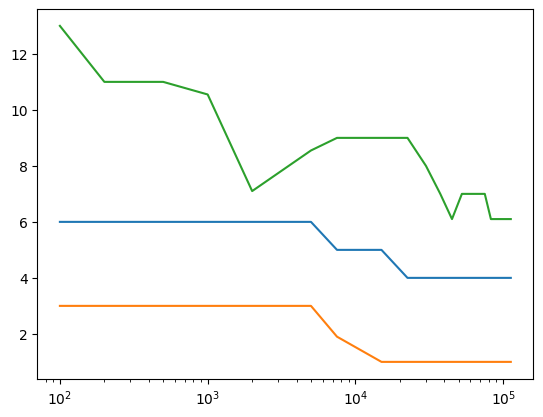

In [50]:
w = "bw"
dd = data[w].I_dists
pc = percentile(data[w].I_best_freqs[0], [5,50,95], axis=0)
m = mean(data[w].I_best_freqs[0],axis=0)
s =  std(data[w].I_best_freqs[0],axis=0)
semilogx(dd,pc[1])
plot(dd,pc[0])
plot(dd,pc[2])
#semilogx(dd,m)
#semilogx(dd,m+s)
#semilogx(dd,m-s)
#plot(np.min(data["cr"].I_best_freqs[0],axis=0))
#plot(np.max(data["cr"].I_best_freqs[0],axis=0))

In [23]:
c

Magnitude,[[19.0 19.0 22.0 20.35 22.0 19.0 22.0 21.45 21.0 21.0 73.0 73.0 73.0 73.0 70.8 57.9 57.0 40.50000000000001 34.650000000000006 25.9 25.9 25.9 25.9 27.0 30.700000000000003 2.0 2.0] [30.0 30.0 30.0 30.0 30.0 45.5 77.5 78.0 78.0 78.0 80.0 83.0 86.0 86.0 86.0 86.0 86.0 86.0 69.0 64.0 64.0 64.0 64.0 61.0 51.0 47.0 2.0] [69.74999999999999 74.74999999999999 77.0 77.0 81.74999999999999 83.94999999999997 88.0 88.0 95.55 96.0 95.55 93.0 93.55 94.0 94.0 94.0 94.0 94.0 94.0 92.0 92.0 91.55 81.54999999999994 69.55 69.0 100.0 100.0]]
Units,Hz


# Compute statistics all at once

### Set the desired window size(s) for the analysis

In [4]:
wnd_sec_vals = [1 * UNITS.s]#, 2 * UNITS.s]

### Compute the metrics for the specified window sizes

In [13]:
dmax_um = {"bw":np.inf, "cr":np.inf}
data_wnd = {}
for wnd_sec in wnd_sec_vals:
    wnd = {k:int(F.fs*wnd_sec) for k, F in data.items()}
    istart = {k:0 if k[0] == "b" else 1000 for k, F in data.items()} 
    [(print(k, end = ""),
      sys.stdout.flush(),
      F.compute_all_for_window(wnd = wnd[k],
                               istart = istart[k],
                               window = 'boxcar',
                               tukey_param = 0,
                               dmax_um = dmax_um[k],
                               fit_vars = False,
                               weighting_freq_max = (7 if k == "bw" else 70) * UNITS.Hz,
                               )
      ) for k, F in data.items() if k != "acr"];
    data_wnd[wnd_sec] = deepcopy(data)

cr

           fisher_plumes 2023/04/28 18:20:40     INFO: Window set to self.wnd=1000.


           fisher_plumes 2023/04/28 18:20:40     INFO: Computing trig coefficients for n12dishT with istart=1000 and tukey_param=0 and kwargs={'window': 'boxcar'}


           fisher_plumes 2023/04/28 18:20:40     INFO: Computing coefficients for 1 probes.


           fisher_plumes 2023/04/28 18:20:41     INFO: Computing variances for harmonics.


           fisher_plumes 2023/04/28 18:20:43     INFO: Computing correlations from trig coefficients.


           fisher_plumes 2023/04/28 18:20:53     INFO: Computing lambdas.


           fisher_plumes 2023/04/28 18:20:53    DEBUG: sum(freqs<=fmax)=501.


           fisher_plumes 2023/04/28 18:20:56    DEBUG: data.shape=(51, 2, 6512)


           fisher_plumes 2023/04/28 18:20:56    DEBUG: vars.shape=(2, 51)


           fisher_plumes 2023/04/28 18:21:57    DEBUG: utils.d1(self.la[0]).shape=(51, 501)


           fisher_plumes 2023/04/28 18:21:57     INFO: Computing p-values.


           fisher_plumes 2023/04/28 18:21:57     INFO: (Skipping p-value computation for bootstraps.)


           fisher_plumes 2023/04/28 18:22:13     INFO: Computing R^2-values.


           fisher_plumes 2023/04/28 18:22:13     INFO: (Skipping R^2-value computation for bootstraps.)


           fisher_plumes 2023/04/28 18:22:15     INFO: Computing generalized exponential fit to distance.


           fisher_plumes 2023/04/28 18:22:15     INFO: Using 24 distances <= inf um 


           fisher_plumes 2023/04/28 18:22:15     INFO: Computed λ for 501 frequencies and 24 distances and 51 bootstraps.


           fisher_plumes 2023/04/28 18:22:15     INFO: Not fitting amplitudes, instead using given values.


           fisher_plumes 2023/04/28 18:22:52    DEBUG: self.fit_params[0].shape=(51, 501, 3).


           fisher_plumes 2023/04/28 18:22:52    DEBUG: self.vars_for_freqs[0].shape=(51, 501).


           fisher_plumes 2023/04/28 18:22:52     INFO: Computing Fisher information (v2).


           fisher_plumes 2023/04/28 18:22:52     INFO: Evaluating at distances: [100, 200, 500, 1000, 2000, 3000, 4000, 5000, 7000, 8000, 10000, 12000, 15000, 18000, 20000, 22000, 25000, 30000, 40000, 45000, 48000, 50000, 52000, 55000, 60000, 70000, 100000].


           fisher_plumes 2023/04/28 18:22:52    DEBUG: self.I[0].shape=(51, 501, 27) has the expected value.


           fisher_plumes 2023/04/28 18:22:52     INFO: Done computing all for wnd=1000.


bw

           fisher_plumes 2023/04/28 18:22:52     INFO: Window set to self.wnd=50.


           fisher_plumes 2023/04/28 18:22:52     INFO: Computing trig coefficients for boulder16 with istart=0 and tukey_param=0 and kwargs={'window': 'boxcar'}


           fisher_plumes 2023/04/28 18:22:52     INFO: Computing coefficients for 1 probes.


           fisher_plumes 2023/04/28 18:22:53     INFO: Computing variances for harmonics.


           fisher_plumes 2023/04/28 18:22:53     INFO: Computing correlations from trig coefficients.


           fisher_plumes 2023/04/28 18:22:53     INFO: Computing lambdas.


           fisher_plumes 2023/04/28 18:22:53    DEBUG: sum(freqs<=fmax)=26.


           fisher_plumes 2023/04/28 18:22:53    DEBUG: data.shape=(51, 2, 3808)


           fisher_plumes 2023/04/28 18:22:53    DEBUG: vars.shape=(2, 51)


           fisher_plumes 2023/04/28 18:22:56    DEBUG: utils.d1(self.la[0]).shape=(51, 26)


           fisher_plumes 2023/04/28 18:22:56     INFO: Computing p-values.


           fisher_plumes 2023/04/28 18:22:56     INFO: (Skipping p-value computation for bootstraps.)


           fisher_plumes 2023/04/28 18:22:57     INFO: Computing R^2-values.


           fisher_plumes 2023/04/28 18:22:57     INFO: (Skipping R^2-value computation for bootstraps.)


           fisher_plumes 2023/04/28 18:22:57     INFO: Computing generalized exponential fit to distance.


           fisher_plumes 2023/04/28 18:22:57     INFO: Using 16 distances <= inf um 


           fisher_plumes 2023/04/28 18:22:57     INFO: Computed λ for 26 frequencies and 16 distances and 51 bootstraps.


           fisher_plumes 2023/04/28 18:22:57     INFO: Not fitting amplitudes, instead using given values.


           fisher_plumes 2023/04/28 18:23:01    DEBUG: self.fit_params[0].shape=(51, 26, 3).


           fisher_plumes 2023/04/28 18:23:01    DEBUG: self.vars_for_freqs[0].shape=(51, 26).


           fisher_plumes 2023/04/28 18:23:01     INFO: Computing Fisher information (v2).


           fisher_plumes 2023/04/28 18:23:01     INFO: Evaluating at distances: [100, 200, 500, 1000, 2000, 5000, 7500, 15000, 22500, 30000, 37500, 45000, 52500, 60000, 67500, 75000, 82500, 90000, 97500, 105000, 112500].


           fisher_plumes 2023/04/28 18:23:01    DEBUG: self.I[0].shape=(51, 26, 21) has the expected value.


           fisher_plumes 2023/04/28 18:23:01     INFO: Done computing all for wnd=50.


### Set the time window of data that we want to plot

In [16]:
wnd_sec = wnd_sec_vals[0]
data = deepcopy(data_wnd[wnd_sec])

### Whether to save the plots we make and where to put them

In [55]:
SAVEPLOTS = True # Whether to actually make the plots

In [56]:
fig_dir_fun = lambda wnd_sec: f"figs/wnd_{wnd_sec.magnitude:g}sec"
fig_dir = fig_dir_fun(wnd_sec)
if not os.path.exists(fig_dir):
    print(f"Creating {fig_dir=}")
    os.mkdir(fig_dir)
else:
    print(f"{fig_dir=} already exists.")

fig_dir='figs/wnd_1sec' already exists.


# Figure showing an example plume and correlations

In [19]:
DEFAULT   = "default"
isdefault = lambda x: type(x) is str and x == DEFAULT

INFO:boulder:Loading fld='c1a' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c1a_t40.p'.


INFO:boulder:Loading fld='c1b' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c1b_t40.p'.


INFO:boulder:Loading fld='c2a' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c2a_t40.p'.


INFO:boulder:Loading fld='c2b' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c2b_t40.p'.


INFO:boulder:Loading fld='c3a' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c3a_t40.p'.


INFO:boulder:Loading fld='c3b' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c3b_t40.p'.


INFO:boulder:Loading fld='c4a' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c4a_t40.p'.


INFO:boulder:Loading fld='c4b' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c4b_t40.p'.


INFO:boulder:Loading fld='c5a' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c5a_t40.p'.


INFO:boulder:Loading fld='c5b' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c5b_t40.p'.


INFO:boulder:Loading fld='c6a' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c6a_t40.p'.


INFO:boulder:Loading fld='c6b' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c6b_t40.p'.


INFO:boulder:Loading fld='c7a' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c7a_t40.p'.


INFO:boulder:Loading fld='c7b' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c7b_t40.p'.


INFO:boulder:Loading fld='c8a' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c8a_t40.p'.


INFO:boulder:Loading fld='c8b' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c8b_t40.p'.


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


INFO:crick:Loading fld='S1' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/crick/saved-snapshots/y495_S1_t40.p'.


INFO:crick:Loading fld='S1' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/crick/saved-snapshots/y550_S1_t40.p'.


INFO:crick:Loading fld='S1' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/crick/saved-snapshots/y490_S1_t40.p'.


INFO:crick:Loading fld='S1' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/crick/saved-snapshots/y498_S1_t40.p'.


INFO:crick:Loading fld='S1' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/crick/saved-snapshots/y505_S1_t40.p'.


INFO:crick:Loading fld='S1' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/crick/saved-snapshots/y502_S1_t40.p'.


INFO:crick:Loading fld='S1' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/crick/saved-snapshots/y510_S1_t40.p'.


INFO:crick:Loading fld='S1' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/crick/saved-snapshots/y520_S1_t40.p'.


INFO:crick:Loading fld='S1' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/crick/saved-snapshots/y480_S1_t40.p'.


INFO:crick:Loading fld='S1' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/crick/saved-snapshots/y450_S1_t40.p'.


INFO:crick:Loading fld='S1' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/crick/saved-snapshots/y500_S1_t40.p'.


Wrote figs/wnd_2sec/plumes_demo_bw.pdf.


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Wrote figs/wnd_2sec/plumes_demo_cr.pdf.


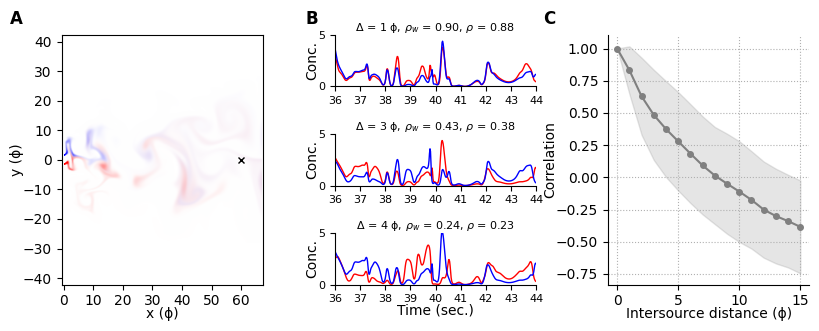

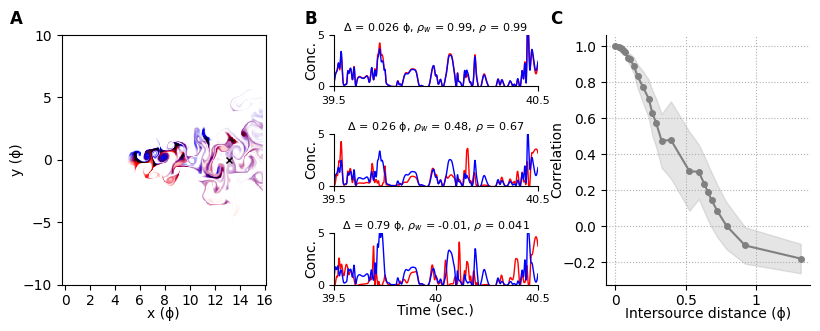

In [15]:
reload(fpf)
reload(fpft)

which_srcs   = {"bw":[-3750, 3750],        "cr":[490000,510000]}
t_wnd        = {"bw":[-4,4]*UNITS.sec,     "cr":[-0.5, 0.5]*UNITS.sec}
which_idists = {"bw":[0,2,3],              "cr":[0,10,20]}
tticks       = {"bw":DEFAULT,              "cr":[39.5,40,40.5]}
xticks       = {"bw":DEFAULT,              "cr":DEFAULT}
yticks       = {"bw":DEFAULT,              "cr":DEFAULT}

for k, F in sorted(data.items()):
    data_dir = os.path.join(os.environ["FISHER_PLUMES_DATA"], {"bw":"boulder", "cr":"crick"}[k], "saved-snapshots")
    ax_plume, ax_traces, ax_corr = fpf.plot_plumes_demo(F, 40 * UNITS.sec, which_srcs[k], y_lim = (0,5.01),
                                                        t_wnd = t_wnd[k], dt = 1 * UNITS.sec, which_idists=which_idists[k], data_dir=data_dir)
    not isdefault(tticks[k]) and ax_traces[-1].set_xticks(tticks[k])    
    not isdefault(xticks[k]) and ax_plume.set_xticks(xticks[k])
    not isdefault(yticks[k]) and ax_plume.set_yticks(yticks[k])

    fpft.label_axes([ax_plume, ax_traces[0], ax_corr], "ABC", y = [0.99]*3, fontsize=12, fontweight="bold")
    file_name = f"{fig_dir}/plumes_demo_{k}.pdf"
    SAVEPLOTS and (savefig(file_name, bbox_inches='tight'), print(f"Wrote {file_name}."));    

# Set the probe index we'll use

In [57]:
iprb = 0

# Figure showing the distribution of correlations

cr
Mapped frequencies [ 1  3  7 10] Hz to indices [1, 3, 7, 10].


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/numpy/ma/core.py:2358: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  a = np.array(a, copy=copy, subok=True)
/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Wrote figs/wnd_1sec/corr_components_cr.pdf.
bw
Mapped frequencies [ 1  3  7 10] Hz to indices [1, 3, 7, 10].


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/numpy/ma/core.py:2358: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  a = np.array(a, copy=copy, subok=True)
/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Wrote figs/wnd_1sec/corr_components_bw.pdf.


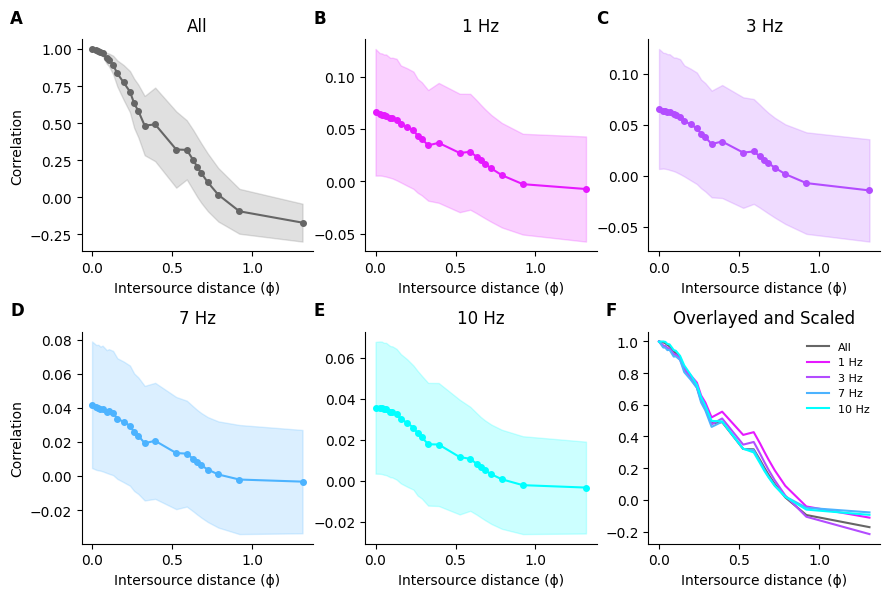

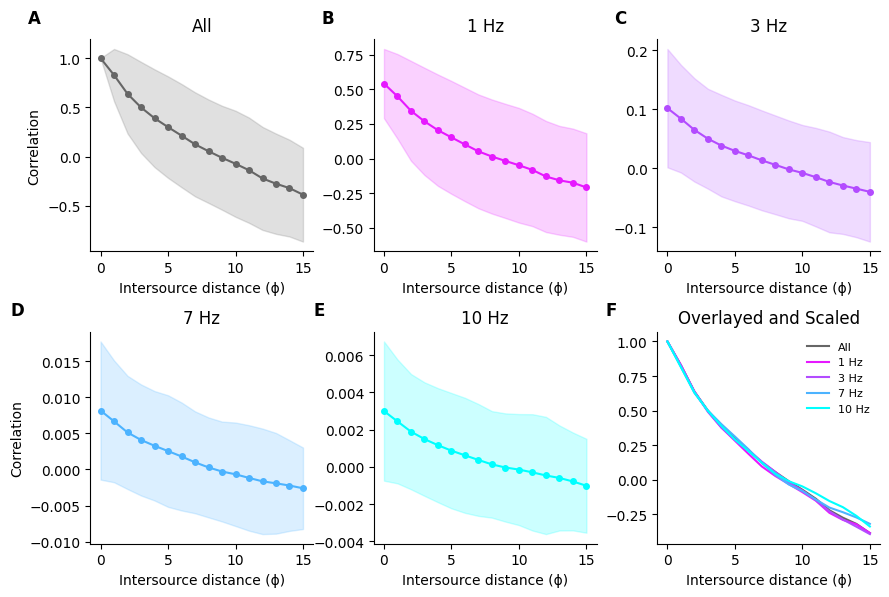

In [22]:
reload(fpf)
which_freqs = [1,3,7,10] * UNITS.hertz
labs = [f"{f}" for f in which_freqs]
cols = {"All":cm.gray(0.4)}; cols.update({l:col for l,col in zip(labs, [cm.cool(1 - f.magnitude/10) for f in which_freqs])})
xlims_  = {"bw":DEFAULT, "cr":DEFAULT}
xticks_ = {"bw":DEFAULT, "cr":DEFAULT}
for k, F in data.items():
    print(k)
    slices = {"All":slice(1,10000)}
    freq_inds = F.freqs2inds(which_freqs)
    print(f"Mapped frequencies {which_freqs} to indices {freq_inds}.")
    slices.update({l:slice(fi, fi+1) for l, fi in zip(labs, freq_inds)})
    ax = fpf.plot_correlations(F.rho[iprb], F.pitch, slices=slices, cols=cols, n_rows = 2, plot_order = ["All"] + labs)
    [(axi.set_xlabel(f"Intersource distance ({fpf.pitch_sym})"),
      not isdefault(xlims_[k])  and axi.set_xlim(xlims_[k]),
      not isdefault(xticks_[k]) and axi.set_xticks(xticks_[k])) for axi in ax]    
    file_name = f"{fig_dir}/corr_components_{k}.pdf"
    fpft.label_axes(ax, "ABCDEF", fontsize=12, fontweight="bold", dy=-0.01)        
    SAVEPLOTS and (savefig(file_name, bbox_inches='tight'), print(f"Wrote {file_name}."))

# The Multivariate Gaussian Fits

bw
Mapped 5 Hz to index 5.


Wrote figs/wnd_1sec/coef_vs_coef_bw_5Hz.pdf.
cr
Mapped 5 Hz to index 5.


Wrote figs/wnd_1sec/coef_vs_coef_cr_5Hz.pdf.


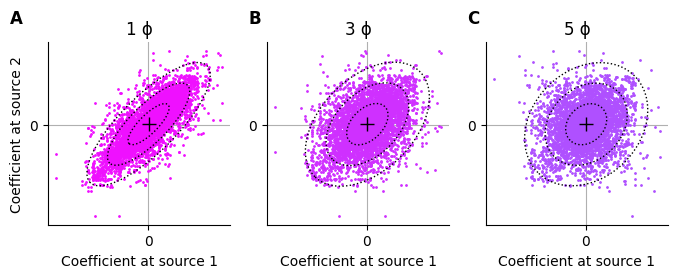

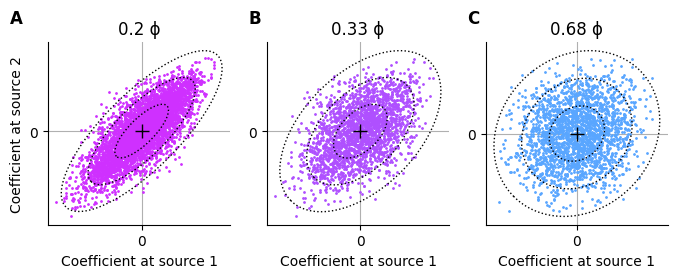

In [23]:
reload(fpf)
which_freqs = {"bw":5 * UNITS.hertz,       "cr":5 * UNITS.hertz}
which_idists= {"bw":[0,2,4], "cr":[8,12,18]}
dcol_scales = {"bw":120000,  "cr":80000}
for name, F in sorted(data.items()):
    print(name)
    which_freq = which_freqs[name]
    ifreq = F.freqs2inds([which_freq])[0]
    print(f"Mapped {which_freq} to index {ifreq}.")
    ax = fpf.plot_coef1_vs_coef2([F.ss[iprb], F.cc[iprb]],
                                 ifreq,
                                 F.pairs_um,
                                 F.pitch_units,                                 
                            i_pos_dists_to_plot = which_idists[name],
                            dist_col_scale = dcol_scales[name]
    )
    fpft.label_axes(ax, "ABC", fontsize=12, fontweight="bold", dy=-0.01)            
    file_name = f"{fig_dir}/coef_vs_coef_{name}_{which_freq.magnitude}Hz.pdf"
    SAVEPLOTS and (savefig(file_name, bbox_inches='tight'), print(f"Wrote {file_name}."));

# Supplementary Information

/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Wrote figs/wnd_1sec/coefs_and_traces_bw_5Hz.pdf.


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Wrote figs/wnd_1sec/coefs_and_traces_cr_5Hz.pdf.


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Wrote figs/wnd_2sec/coefs_and_traces_bw_5Hz.pdf.


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Wrote figs/wnd_2sec/coefs_and_traces_cr_5Hz.pdf.


<Figure size 800x300 with 0 Axes>

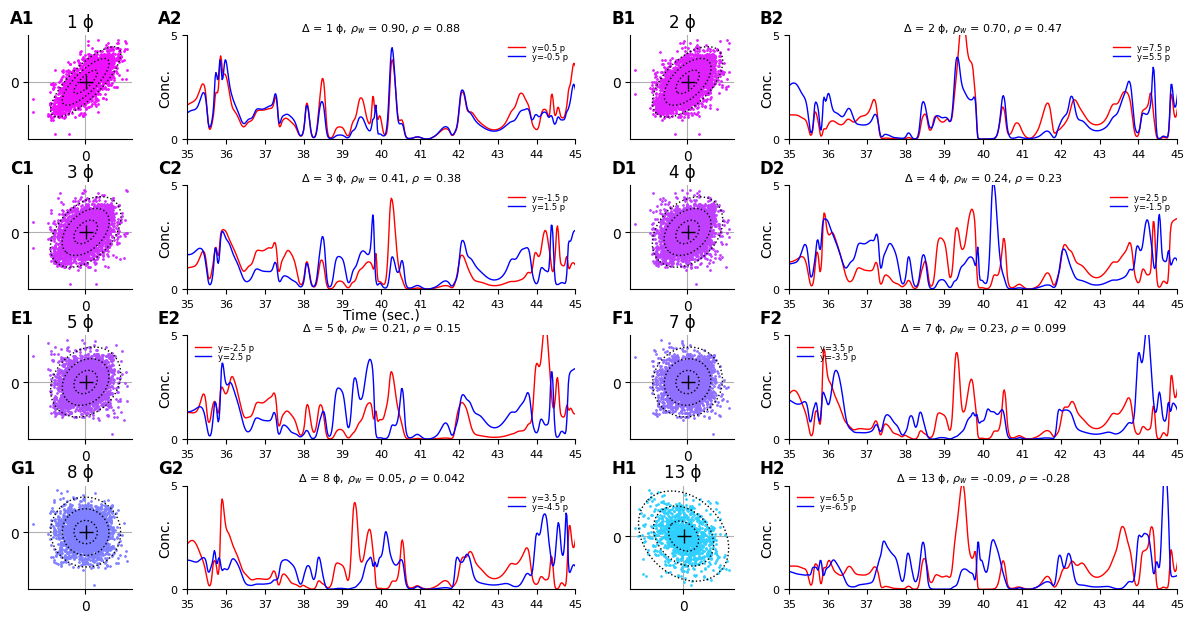

<Figure size 800x300 with 0 Axes>

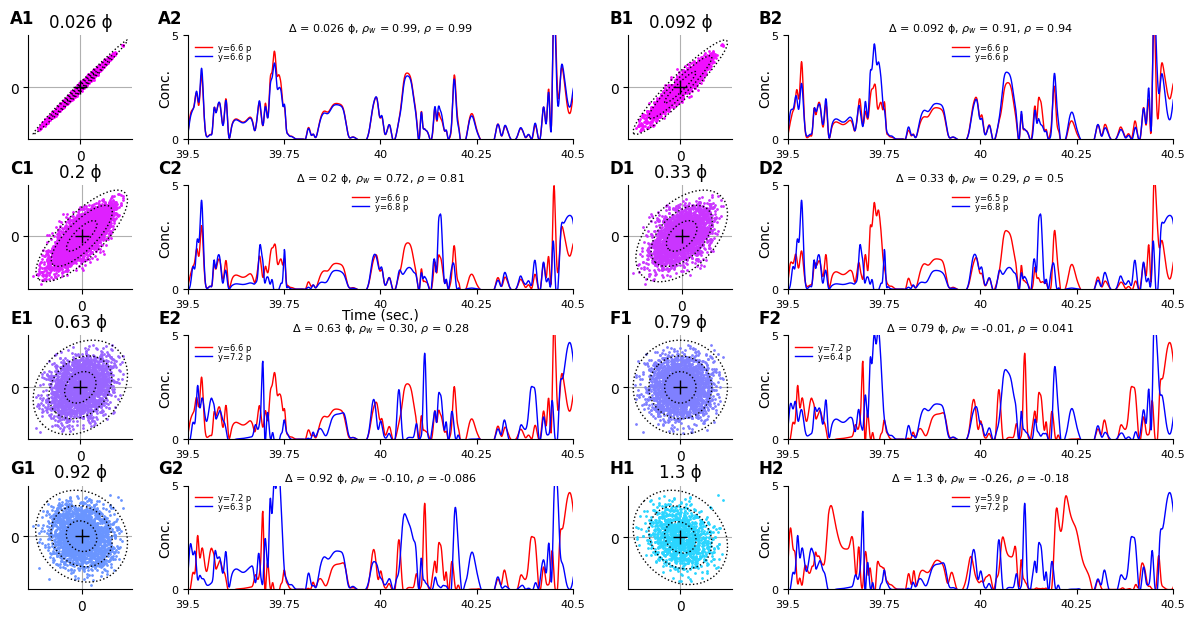

<Figure size 800x300 with 0 Axes>

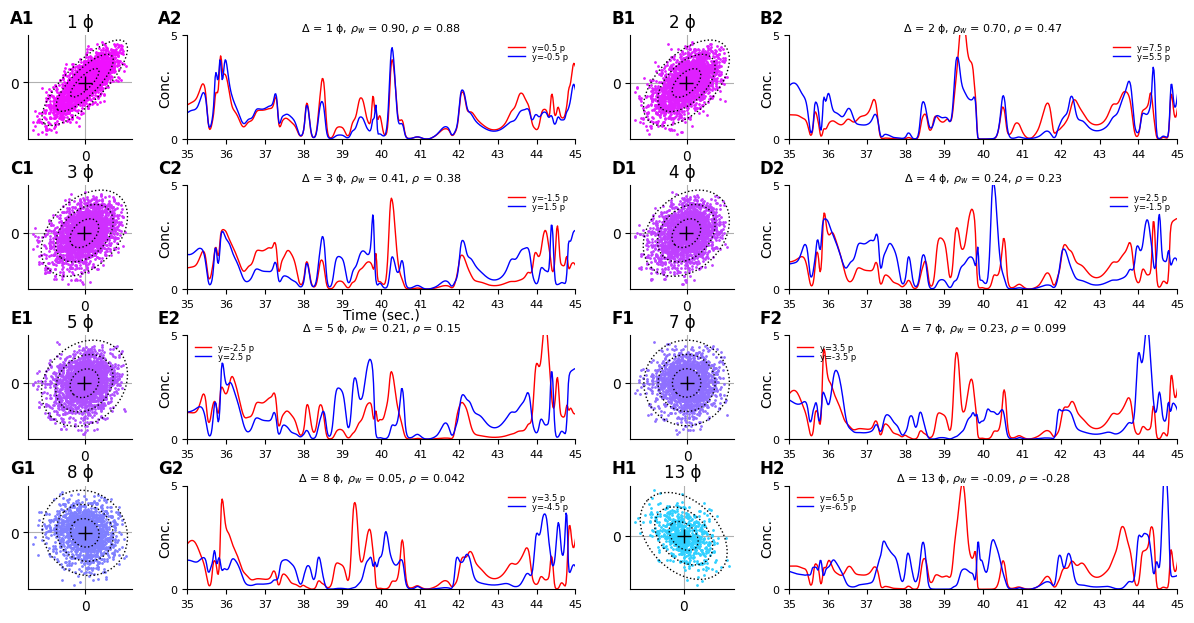

<Figure size 800x300 with 0 Axes>

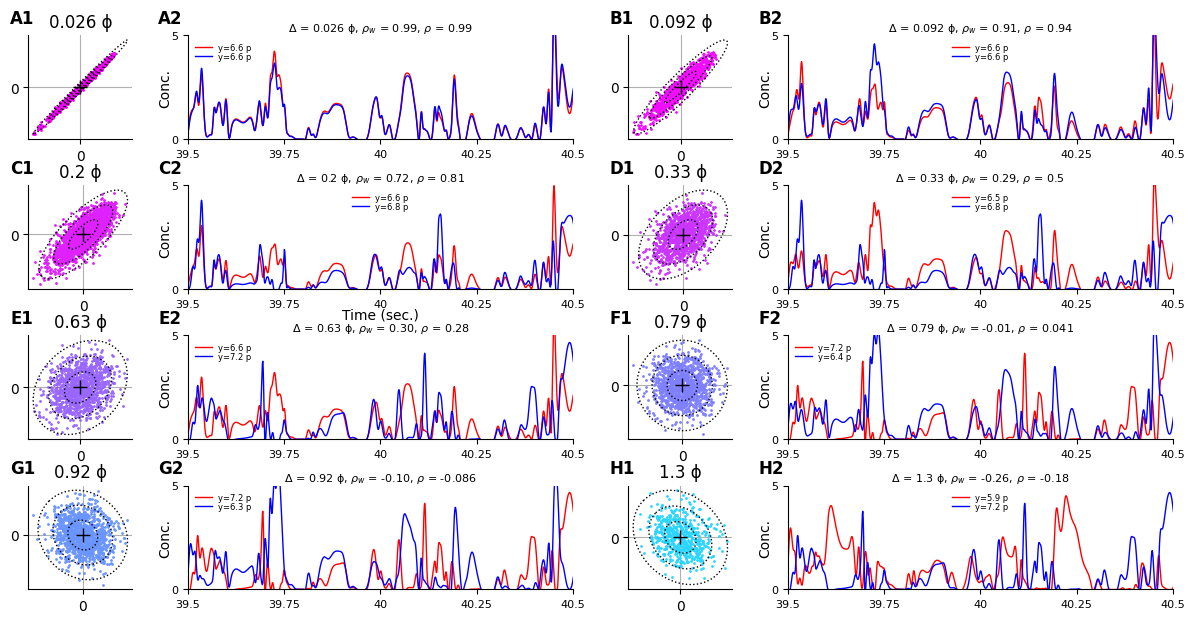

In [24]:
reload(fpf)
reload(fpft)
freq      = {"bw":5 * UNITS.hertz,          "cr":5 * UNITS.hertz}
idists    = {"bw":[0,1,2,3,4,6,7,12],       "cr":[0,4,8,12,16,20,21,22]}
t_lim     = {"bw":[35, 45]*UNITS.sec,       "cr":[39.5,40.5]*UNITS.sec}
dt        = {"bw":1*UNITS.sec,              "cr":0.25*UNITS.sec}
for ws, data_ws in data_wnd.items():
    for k, F in sorted(data_ws.items()):
        figure(figsize=(12,6))
        coef_ax, trace_ax = fpf.plot_coef_vs_coef_and_traces(F, freq[k], idists[k],
                                                             which_probe = iprb, n_per_row = 2,
                                                             y_lim=[0,5],
                                                             t_lim = t_lim[k],
                                                             dt = dt[k])
        for ax in coef_ax:
            ax.set_xlabel("")
            ax.set_ylabel("")
        [ax.legend(fontsize=6,labelspacing=0,frameon=False) for ax in trace_ax]
        tight_layout(pad=0)
        all_ax = bsum([[ax_c, ax_t] for ax_c, ax_t in zip(coef_ax, trace_ax)], [])
        n_ax   = len(all_ax)
        fpft.label_axes(all_ax,
                        [ch+nu for ch in "ABCDEFGH" for nu in "12"],
                        align_x = [list(range(i,n_ax,4)) for i in range(4)],
                        align_y = [list(range(i,i+4)) for i in range(0,n_ax,4)],
                        fontsize=12, fontweight="bold", dy=-0.01)
        file_name = f"{fig_dir_fun(ws)}/coefs_and_traces_{k}_{freq[k].to(UNITS.hertz).magnitude}Hz.pdf"
        SAVEPLOTS and (savefig(file_name, bbox_inches='tight'), print(f"Wrote {file_name}."));

# Asymmetric Laplacian Fits

d=7500 @ Freq #   1: -np.log10(p) = 142.277
d=15000 @ Freq #   1: -np.log10(p) = 105.410
d=22500 @ Freq #   1: -np.log10(p) = 75.585
Setting extent to [-0.5, 15.5, 0.5, 20.5].


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Wrote figs/wnd_1sec/alap_fits_bw_1Hz.pdf.
d=7500 @ Freq #   5: -np.log10(p) = 3.393
d=15000 @ Freq #   5: -np.log10(p) = 1.215
d=22500 @ Freq #   5: -np.log10(p) = 1.713
Setting extent to [-0.5, 15.5, 0.5, 20.5].


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Wrote figs/wnd_1sec/alap_fits_bw_5Hz.pdf.
d=7500 @ Freq #  10: -np.log10(p) = 29.570
d=15000 @ Freq #  10: -np.log10(p) = 12.817
d=22500 @ Freq #  10: -np.log10(p) = 8.230
Setting extent to [-0.5, 15.5, 0.5, 20.5].


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Wrote figs/wnd_1sec/alap_fits_bw_10Hz.pdf.
d=2000 @ Freq #   1: -np.log10(p) = 1.847
d=25000 @ Freq #   1: -np.log10(p) = 0.519
d=52000 @ Freq #   1: -np.log10(p) = 0.429
Setting extent to [-0.5, 23.5, 0.5, 100.5].


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Wrote figs/wnd_1sec/alap_fits_cr_1Hz.pdf.
d=2000 @ Freq #   5: -np.log10(p) = 2.532
d=25000 @ Freq #   5: -np.log10(p) = 1.676
d=52000 @ Freq #   5: -np.log10(p) = 0.815


Setting extent to [-0.5, 23.5, 0.5, 100.5].


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Wrote figs/wnd_1sec/alap_fits_cr_5Hz.pdf.
d=2000 @ Freq #  10: -np.log10(p) = 2.531
d=25000 @ Freq #  10: -np.log10(p) = 1.708
d=52000 @ Freq #  10: -np.log10(p) = 0.462
Setting extent to [-0.5, 23.5, 0.5, 100.5].


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Wrote figs/wnd_1sec/alap_fits_cr_10Hz.pdf.


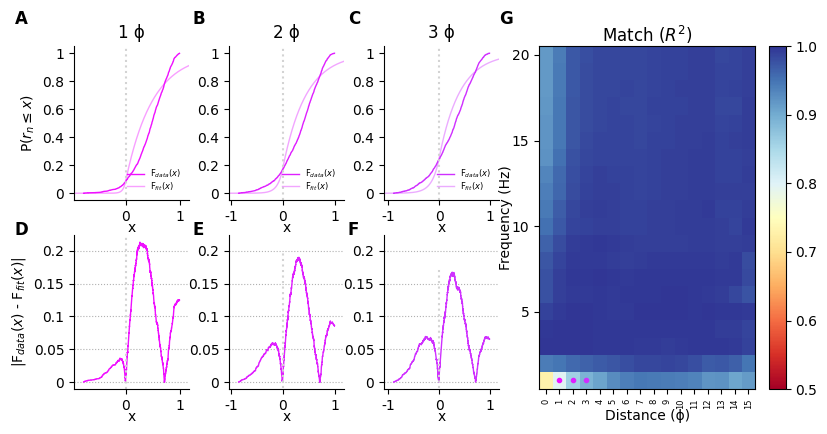

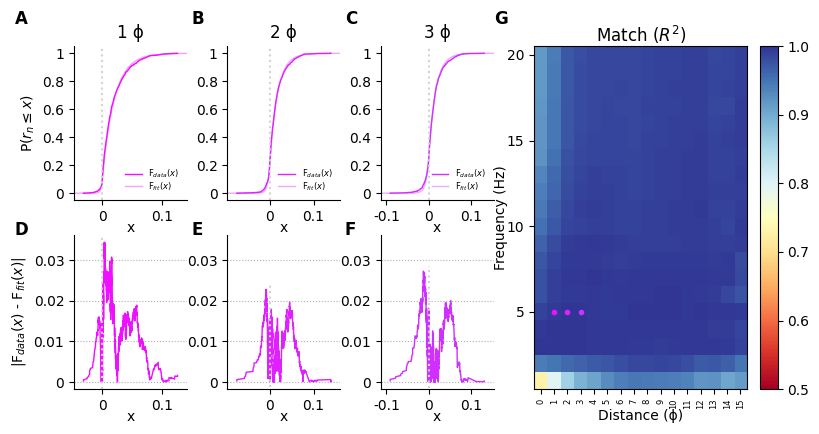

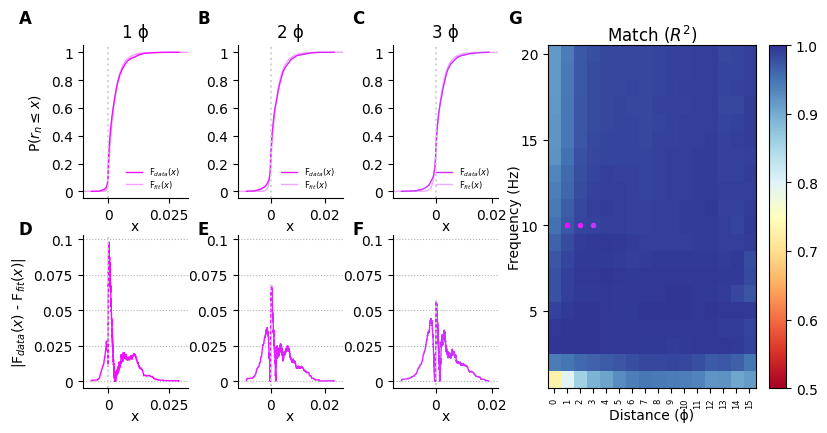

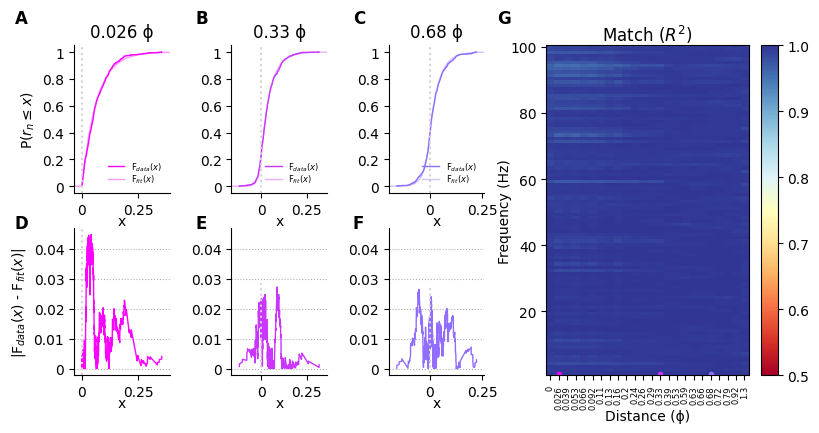

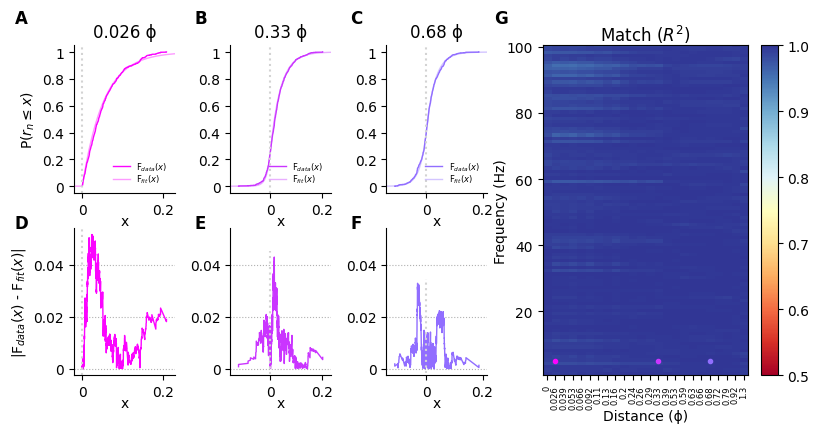

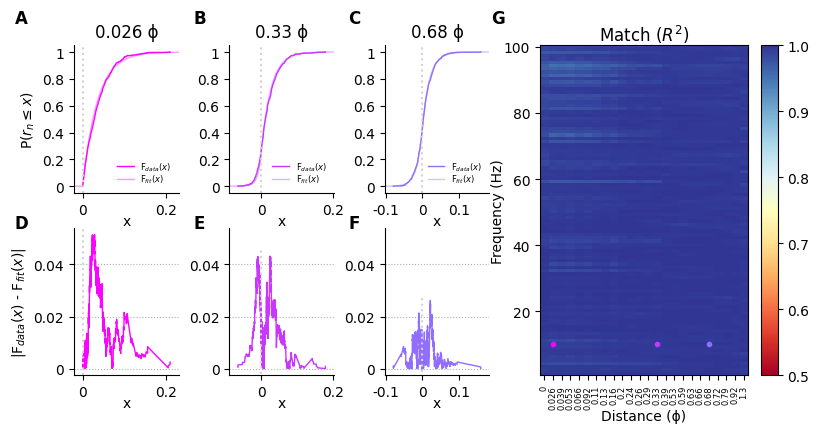

In [25]:
reload(fpft)
reload(fpf)
which_wnd_sec = wnd_sec_vals[0]
idist     = {"bw":[1,2,3],       "cr":[1,13,19]}
freq_max  = {"bw":21 * UNITS.hertz,            "cr":101 * UNITS.hertz}
vmin      = {"bw":[0,0.5],       "cr":[0,0.5]}
vmax      = {"bw":[50,1],        "cr":[10,1]}
plot_pvals= False
for name, F in sorted(data_wnd[which_wnd_sec].items()):
    d = np.array(list(F.rho[iprb].keys()))
    d = np.sort(d[d>=0])
    for f in [1, 5, 10] * UNITS.hertz:
        which_freq = {"bw":f, "cr":f}
        ax_cdf, ax_dcdf, ax_hm = fpf.plot_alaplace_fits(F, d[idist[name]],
                                                        which_probe = iprb,
                               ifreq_lim = [1, F.freqs2inds([freq_max[name]])[0]],
                               which_ifreq = F.freqs2inds([which_freq[name]])[0],
                                                        figsize=(8,4),
                                                        vmax=vmax[name],
                                                        vmin=vmin[name],
                                                        plot_dvals=True,
                                                        plot_pvals=plot_pvals)
        tight_layout(pad=0)
        fpft.label_axes(ax_cdf + ax_dcdf + ax_hm, "ABCDEFGHIJK",
                        align_y = [[0,1,2,6],[3,4,5,7]] if plot_pvals else [[0,1,2],[3,4,5]],
                        align_x = [[0,3],[1,4],[2,5]],
                        fontsize=12, fontweight="bold", dy=0)
        file_name = f"{fig_dir_fun(which_wnd_sec)}/alap_fits_{name}_{which_freq[name].to(UNITS.hertz).magnitude}Hz.pdf"
        SAVEPLOTS and (savefig(file_name, bbox_inches='tight'), print(f"Wrote {file_name}."));

# Plot the figure showing λ(s)

      fisher_plumes_figs 2023/04/28 18:46:08     INFO: plot_gen_exp_paramter_fits_panel with which_fis=[1, 3, 7, 10], log_scale=True.


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/colors.py:710: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  xa = np.array(X, copy=True)


/nemo/lab/schaefera/working/tootoos/git/fisher-plumes/fisher_plumes_figs.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  log_scale and plt.gca().set_xticklabels(f"{10**xti:.2g}" for xti in xt)
/nemo/lab/schaefera/working/tootoos/git/fisher-plumes/fisher_plumes_figs.py:428: UserWarning: FixedFormatter should only be used together with FixedLocator
  log_scale and plt.gca().set_yticklabels(f"{10**yti:.2g}" for yti in yt)


NameError: name 'fig_dir' is not defined

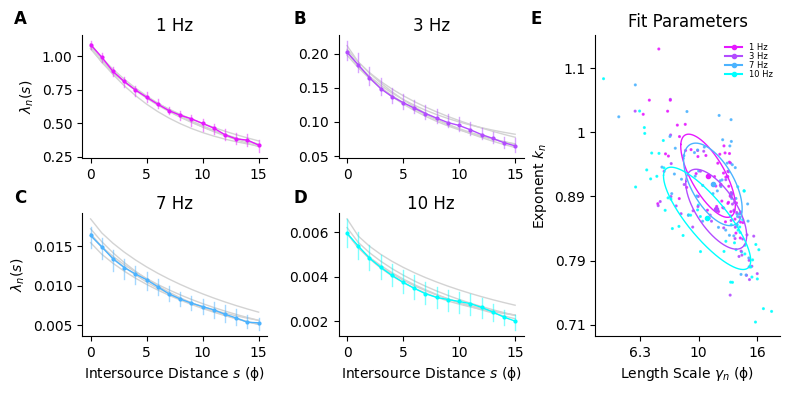

NameError: name 'fig_dir' is not defined

In [53]:
reload(fpft)
reload(fpf)
xl     = {"bw":(-10,200),                 "cr": (-2, 50)}
freqs  = {"bw":[1,3,7,10] * UNITS.hertz,  "cr": [1,3,7,10] * UNITS.hertz}
xt     = {"bw":arange(0,201,50),          "cr": arange(0,101,25)}
xtp    = {"bw":np.array([60,90,135]),     "cr": np.array([40,60, 90, 135])}
ytp    = {"bw":np.array([0.8,1,1.2,1.5]), "cr": np.array([0.8,1,1.2,1.5,2])}
for k, F in sorted(data.items()):
    ax = fpf.plot_la_gen_fits_vs_distance(F, 
                                          figsize=(8,4), legloc = 'right',
                                          log_scale = True,
                                          scatter_size=1.5,
                                          which_ifreqs = F.freqs2inds(freqs[k]))
    [((i>1) and axi.set_xlabel(f"Intersource Distance $s$ ({fpf.pitch_sym})")) for i, axi in enumerate(ax[:4])]
    tight_layout(h_pad=1,w_pad=0.5)
    fpft.label_axes(ax, "ABCDEFGHIJK",
                    align_y = [[0,1,4],[2,3]],
                    align_x = [[0,2],[1,3]],
                    fontsize=12, fontweight="bold", dy=-0.02)                        
    file_name = f"{fig_dir}/la_vs_s_fits_{k}.pdf"
    SAVEPLOTS and (savefig(file_name, bbox_inches='tight'), print(f"Wrote {file_name}."));

# Plot the Fisher Information

      fisher_plumes_figs 2023/04/28 19:05:08     INFO: dd[0]=100, dd[-1]=200000


      fisher_plumes_figs 2023/04/28 19:05:08     INFO: Plotting which_ifreqs=[1, 4, 5, 6].


/nemo/lab/schaefera/working/tootoos/git/fisher-plumes/fisher_plumes_figs.py:543: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_fisher.set_xticklabels(ax_fisher.get_xticklabels(), fontsize=8)
/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/numpy/ma/core.py:2826: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  _data = np.array(data, dtype=dtype, copy=copy,


      fisher_plumes_figs 2023/04/28 19:05:09     INFO: dd[0]=100, dd[-1]=100000


Wrote figs/wnd_1sec/fisher_info_bw.pdf.


      fisher_plumes_figs 2023/04/28 19:05:10     INFO: Plotting which_ifreqs=[64, 2, 69, 73, 78, 79, 22, 86, 30].


/nemo/lab/schaefera/working/tootoos/git/fisher-plumes/fisher_plumes_figs.py:543: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_fisher.set_xticklabels(ax_fisher.get_xticklabels(), fontsize=8)
/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/numpy/ma/core.py:2826: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  _data = np.array(data, dtype=dtype, copy=copy,


Wrote figs/wnd_1sec/fisher_info_cr.pdf.


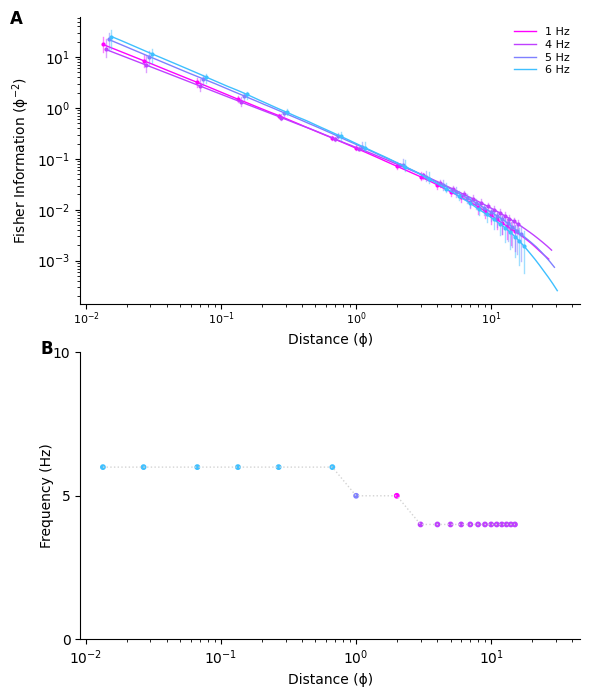

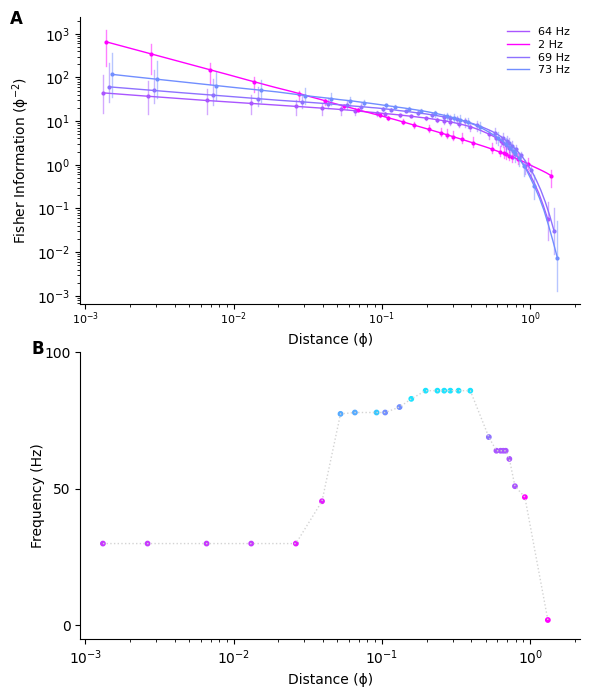

In [70]:
reload(fpt)
reload(fpft)
reload(fpf)
freqs["bw"] = [1, 3, 7, 10] * UNITS.hertz
freqs["cr"] = [10,20,30,40] * UNITS.hertz
freq_max  = {"bw":20 * UNITS.hertz, "cr":100 * UNITS.hertz}
colscale  = {"bw":10, "cr":40}
d_vals_um = {"bw":[1,5,50], "cr":[0.1,10,70]}
d_lim_um  = {"bw":[100, 200000 * 1], "cr":[100, 100000 * 1]}
bf_ytick  = {"bw":[0,5,10], "cr":[0,50,100]}
bf_yl     = {"bw":[0,10], "cr":[-5,100]}
for k, F in sorted(data.items()):
    figure(figsize=(6,7))
    ax_fisher, ax_best_freq, ax_d = fpf.plot_fisher_information(F,
                                                                which_probe = iprb,
                                                                d_lim_um   = d_lim_um[k],
                                                                d_range_um = list(range(100,1000,100)) + list(range(1000,10000,1000))+list(range(10000,60000,10000)),
                                                                d_vals_um  = np.array(d_vals_um[k])*1000,
                                                                d_space_fun  = lambda d0,d1,n:np.logspace(log10(d0),log10(d1),n),
                                                                which_ifreqs = F.freqs2inds(freqs[k]),
                                                                x_stagger = lambda x, i: x*(1.05**i),
                                                                fi_scale  = 1, plot_fun = plt.loglog,
                                                                log_scale = True,
                                                                freq_max  = freq_max[k],
                                                                colfun    = lambda f: cm.cool_r(f/colscale[k]),
                                                                bf_ytick  = bf_ytick[k],
    )
    tight_layout(h_pad=0,w_pad=0)
    fpft.label_axes([ax_fisher, ax_best_freq] + ax_d , "ABCDEFGHIJK",
                    #align_y = [[2,3,4]],
                    #align_x = [[0,1,2]],
                    fontsize=12, fontweight="bold", dy=-0.01)
    ax_best_freq.set_ylim(bf_yl[k])
    file_name = f"{fig_dir}/fisher_info_{k}.pdf"
    SAVEPLOTS and (savefig(file_name, bbox_inches='tight'), print(f"Wrote {file_name}."));
    

In [59]:
data["cr"].I_best_ifreqs[0]

array([[29, 29, 29, ..., 50, 50, 30],
       [29, 29, 29, ..., 27, 50,  1],
       [21, 21, 21, ..., 68, 46,  1],
       ...,
       [21, 21, 21, ..., 63, 42,  1],
       [18, 18, 18, ..., 64, 16,  1],
       [29, 29, 29, ..., 63, 43,  1]])

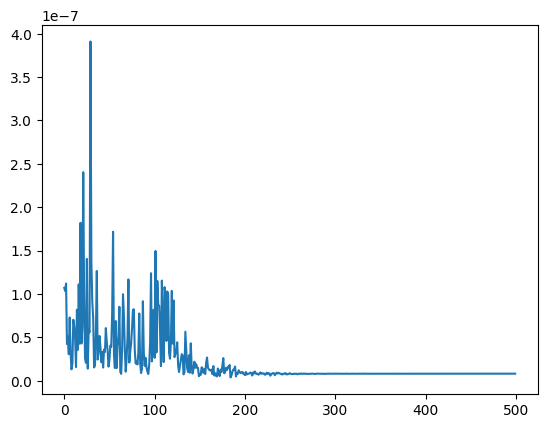

In [51]:
data["cr"].I[0].shape

(51, 501, 27)

# Plot best frequency for each probe

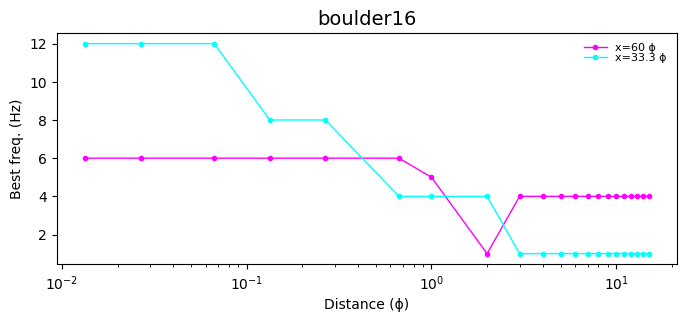

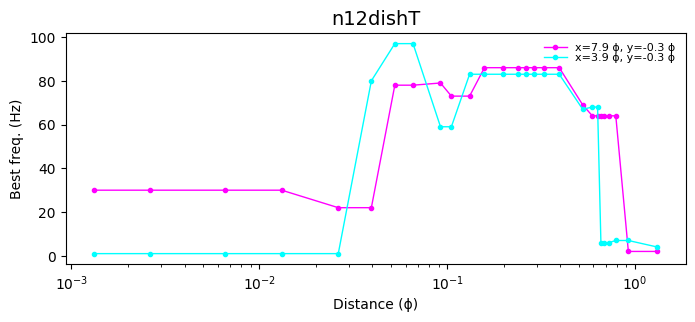

In [16]:
for k, F in sorted(data.items()):
    probe_coords = utils.d1(F.sims).get_used_probe_coords()
    probe_xcoords_sorted = sorted([p[0] for p in probe_coords])
    probe_names = utils.d1(F.sims).coord_strs
    n_probes = len(probe_coords)
    figure(figsize=(8,3))
    dd = F.I_dists/F.pitch.to(UNITS.um).magnitude
    for which_probe, (px,py) in enumerate(probe_coords):
        semilogx(dd, F.freqs[F.I_best_ifreqs[which_probe]],
                 "o-",markersize=3, linewidth=1, color = cm.cool(probe_xcoords_sorted.index(px)/(n_probes-1)), label=probe_names[which_probe])
    xlabel("Distance (ϕ)")
    ylabel("Best freq. (Hz)")
    title(F.name, fontsize=14)
    legend(frameon=False, labelspacing=0, fontsize=8)
    file_name = f"{fig_dir}/best_freq_{k}.pdf"
    SAVEPLOTS and (savefig(file_name, bbox_inches='tight'), print(f"Wrote {file_name}."));
        


# Plot the Power in each Signal

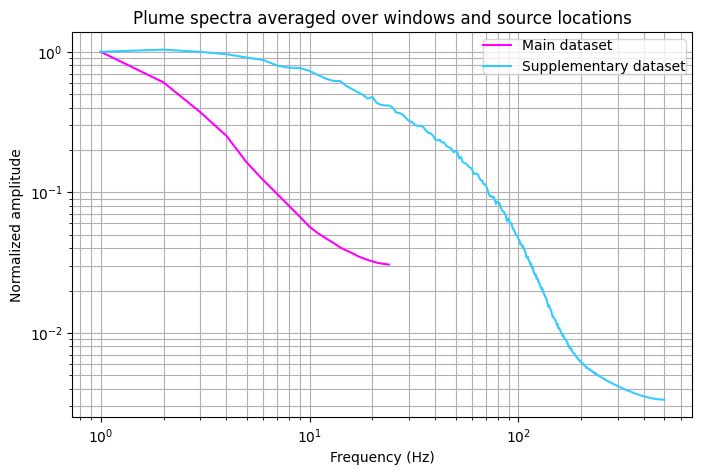

In [17]:
for wnd_in_sec, data in data_wnd.items():
    figure(figsize=(8,5))
    for k, F in sorted(data.items()):
        f = []
        for _, s in F.sims.items():
            fs = F.fs.to(UNITS.hertz).magnitude
            fr, ti, S = stft(s.data[:,iprb], fs = fs, window='boxcar',
                             nperseg=int(fs), noverlap=fs//2, boundary=None, padded=False)
            f.append(np.abs(S))
            
        f = np.array(f)
        a = np.mean(f,axis=-1).mean(axis=0)    
        loglog(fr[fr<fs/2][1:],a[fr<fs/2][1:]/a[1], label="Supplementary dataset" if k=="cr" else "Main dataset", color={"bw":cm.cool_r(0.0), "cr":cm.cool_r(0.8)}[k])
    legend(borderpad=0)
    xlabel("Frequency (Hz)")
    ylabel("Normalized amplitude")
    title("Plume spectra averaged over windows and source locations")
    grid(True, which='both')
    file_name = f"{fig_dir_fun(wnd_in_sec)}/spectra.pdf"
    SAVEPLOTS and (savefig(file_name, bbox_inches='tight'), print(f"Wrote {file_name}."));

In [66]:
f.magnitude

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49.])

In [153]:
ind_freqs

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])

In [154]:
F.freqs

Magnitude,[0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.000000000000001 8.0 9.0 10.0 11.0 12.0 13.0 14.000000000000002 15.0 16.0 17.0 18.0 19.0 20.0 21.0 22.0 23.0 24.0 25.0 26.0 27.0 28.000000000000004 28.999999999999996 30.0 31.0 32.0 33.0 34.0 35.0 36.0 37.0 38.0 39.0 40.0 41.0 42.0 43.0 44.0 45.0 46.0 47.0 48.0 49.0]
Units,Hz


In [228]:
I.shape

(51, 26, 21)

In [231]:
ifreq_max = F.freqs2inds([F.freq_max])[0]

In [235]:
Isort      = [np.argsort(Ii[1:][:, 1:ifreq_max+1,:],axis=1) for Ii in [I]] # Sort frequencies by information
n_freqs    = Isort[0].shape[1]
best_ifreqs = [Isorti[:,-1,:] for Isorti in Isort] # Find the most informative frequency for each bootstrap and distance


In [241]:
sum(F.inds2freqs([1,2,3]))

6.0 <Unit('hertz')>

In [244]:
F.inds2freqs(best_ifreqs[0]+1)

Magnitude,[[6.0 6.0 6.0 ... 4.0 4.0 4.0] [11.0 10.0 14.000000000000002 ... 4.0 4.0 4.0] [6.0 6.0 6.0 ... 5.0 5.0 5.0] ... [11.0 11.0 6.0 ... 4.0 4.0 4.0] [6.0 6.0 6.0 ... 2.0 2.0 2.0] [16.0 16.0 11.0 ... 4.0 4.0 4.0]]
Units,Hz


In [236]:
n_freqs

20

In [ ]:
Isort

In [227]:
F, f_max  = data["bw"], 7
f         = F.freqs.magnitude
ind_freqs = where((f>0) & (f<=f_max))[0]
I         = F.I[0]
If        = einsum('ijk,j',I[:,ind_freqs],f[ind_freqs])
Isum      = sum(I[:,ind_freqs],axis=1)
Iw        = If/Isum
p = percentile(Iw[1:],[5,50,95],axis=0)

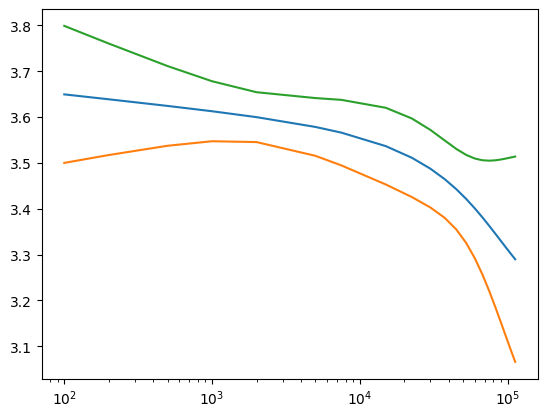

In [185]:
m = mean(Iw[1:],axis=0)
s = std(Iw[1:],axis=0)

semilogx(F.I_dists, m)
semilogx(F.I_dists, m-s)
semilogx(F.I_dists, m+s)


In [104]:
Im.shape

(51, 21)

In [100]:
f<F.freq_max.magnitude

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [101]:
where((f>0) & (f<F.freq_max.magnitude))

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19]),)

In [95]:
f[ind_freqs]

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49.])

In [94]:
f

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49.])

In [93]:
F.ss[0][3750].shape

(51, 119, 26)

In [84]:
data["bw"].vars_for_freqs[0].shape

(51, 26)

In [81]:
f[ind_freqs]

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49.])

In [82]:
I.shape

(51, 26, 21)

In [79]:
I.shape

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
I[

In [77]:
f[ind_freqs]

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49.])

In [63]:
?einsum

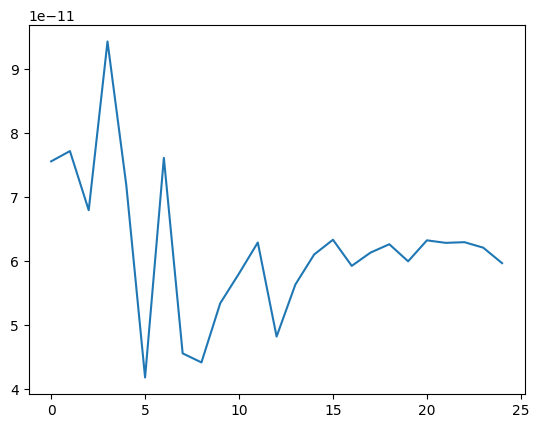

In [60]:

I = data["bw"].I[0][0,1:,-1]
plot(f[:len(I)], I)